# AIA CNN Classification
https://www.kaggle.com/c/aia-cnn-classification/leaderboard


In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt

import numpy as np

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


/home/jovyan/kaggle/aia-image-classification-by-CNN/input/testset
/home/jovyan/kaggle/aia-image-classification-by-CNN/input/testset/ : 1500
(64, 64)


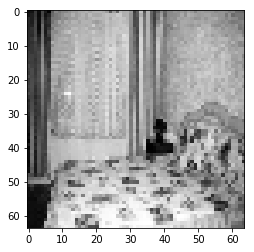

In [2]:
# Load Image Data
import os
import cv2
# get current working directory
train_folder = os.path.join(os.getcwd(), "input/train")
test_folder = os.path.join(os.getcwd(), "input/testset")

# read in and preprocess image
def readImage(pathname):
    oriim = cv2.imread(pathname, cv2.IMREAD_GRAYSCALE)
    if oriim is None:
        print("ERROR:",pathname)
        return None
    im = cv2.resize(oriim, (64, 64)).astype(np.float32)
    # Subtract mean pixel and multiple by scaling constant
    # Reference: https://github.com/shicai/DenseNet-Caffe
    im = im/255.
    return im

def loadImages(folder, className):
    img_folder = os.path.join(folder, className)
    imglist = list(filter(lambda x: x.endswith('.jpg'), os.listdir(img_folder)))
    print(img_folder,':',len(imglist))
    images = [readImage(os.path.join(img_folder, f))[:, :] for f in imglist]
    names = [label[:-4] for label in imglist]
    return names, images

# label ='mountain'
# imglist, images = loadImages(train_folder,label)
# print(images[0].shape)
# plt.imshow(images[0])

# load testing data
print(test_folder)
test_id, x_test = loadImages(test_folder,'')
print(x_test[0].shape)
plt.imshow(x_test[0], cmap='gray')
plt.show()

In [3]:
# Load Target Labels
import pandas as pd
mapping_df=pd.read_csv(os.path.join(os.getcwd(), "input/mapping.txt"), names=('labels', 'target'))
mapping_df = mapping_df.set_index('labels')

CALsuburb : 9
/home/jovyan/kaggle/aia-image-classification-by-CNN/input/train/CALsuburb : 141


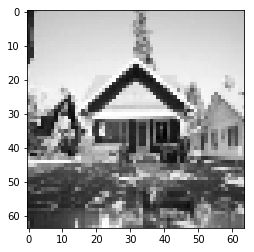

PARoffice : 7
/home/jovyan/kaggle/aia-image-classification-by-CNN/input/train/PARoffice : 115


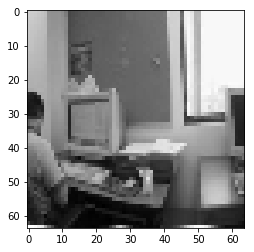

bedroom : 12
/home/jovyan/kaggle/aia-image-classification-by-CNN/input/train/bedroom : 116


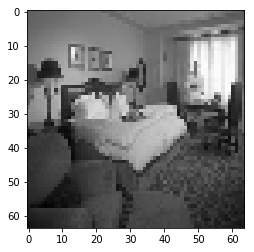

coast : 10
/home/jovyan/kaggle/aia-image-classification-by-CNN/input/train/coast : 260


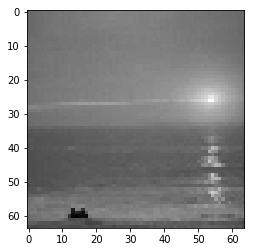

forest : 4
/home/jovyan/kaggle/aia-image-classification-by-CNN/input/train/forest : 228


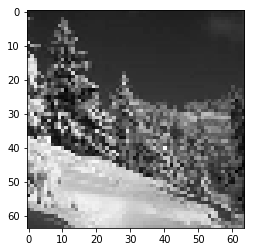

highway : 14
/home/jovyan/kaggle/aia-image-classification-by-CNN/input/train/highway : 160


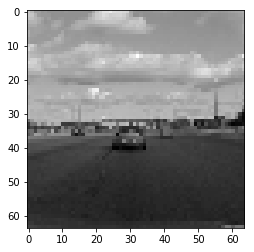

industrial : 2
/home/jovyan/kaggle/aia-image-classification-by-CNN/input/train/industrial : 211


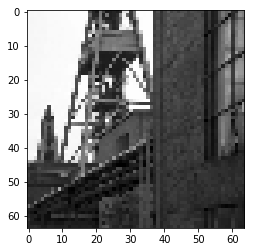

insidecity : 3
/home/jovyan/kaggle/aia-image-classification-by-CNN/input/train/insidecity : 208


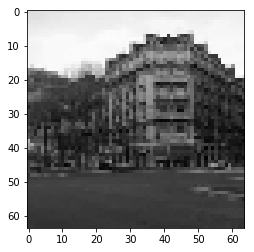

kitchen : 0
/home/jovyan/kaggle/aia-image-classification-by-CNN/input/train/kitchen : 110


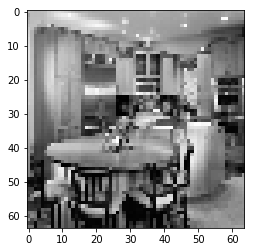

livingroom : 5
/home/jovyan/kaggle/aia-image-classification-by-CNN/input/train/livingroom : 189


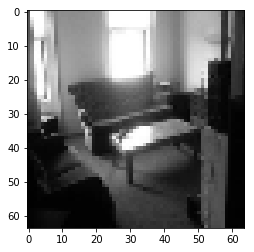

mountain : 8
/home/jovyan/kaggle/aia-image-classification-by-CNN/input/train/mountain : 274


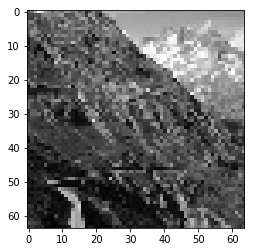

opencountry : 6
/home/jovyan/kaggle/aia-image-classification-by-CNN/input/train/opencountry : 310


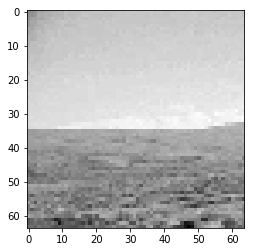

store : 11
/home/jovyan/kaggle/aia-image-classification-by-CNN/input/train/store : 215


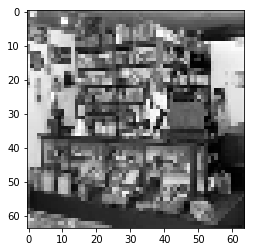

street : 1
/home/jovyan/kaggle/aia-image-classification-by-CNN/input/train/street : 192


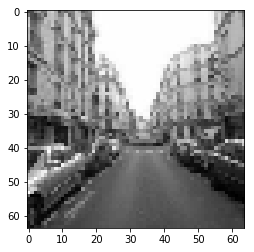

tallbuilding : 13
/home/jovyan/kaggle/aia-image-classification-by-CNN/input/train/tallbuilding : 256


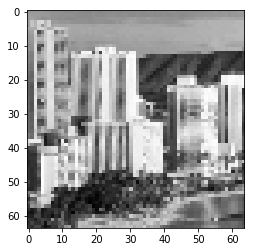

2985 == 2985


In [4]:
# load training data
x_train_all = []
y_train_all = []
index = 0
for label in mapping_df.index:
    print(label,':',mapping_df.loc[label]['target'])
    _x_name, _x_train = loadImages(train_folder,label)
    # create list with target value
    _y_train = [mapping_df.loc[label]['target']]*len(_x_train) 
    x_train_all = x_train_all + _x_train
    y_train_all = y_train_all + _y_train
    plt.imshow(_x_train[0], cmap='gray')
    plt.show()
    
print(len(x_train_all),'==',len(y_train_all))

In [5]:
# check data
x_train_np = np.array(x_train_all)[:,:,:,np.newaxis]
x_test_np = np.array(x_test)[:,:,:,np.newaxis]
print('input layer:', x_train_np.shape)
print('input layer:', x_train_np[0].shape)
print('output layer:',set(y_train_all))

input layer: (2985, 64, 64, 1)
input layer: (64, 64, 1)
output layer: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}


In [6]:
# build our CNN model
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train_np[0].shape))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(set(y_train_all))))
model.add(Activation('softmax'))

print(model.summary())

# initiate Adam optimizer
opt = keras.optimizers.Adam()

# Let's train the model using Adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 62, 62, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 64)        73792     
__________

In [7]:
y_train_all = pd.get_dummies(y_train_all)
print(y_train_all.head())

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train_np, y_train_all, test_size=0.1)


   0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
1   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
2   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
3   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
4   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0


In [8]:
print('Using real-time data augmentation.')
batch_size = 128
num_classes = 10
epochs = 100
model_name = 'best_model.h5'

model_path = os.path.join(os.getcwd(), model_name)

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  

checkpoint = ModelCheckpoint(model_path, monitor='val_acc', mode='max', save_best_only=True, verbose=1)


# earlystop
earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

Using real-time data augmentation.


In [9]:
# Fit the model on the batches generated by datagen.flow().
print('x = ',len(x_train_all),":",x_train_all[0].shape)
print('y = ',len(y_train_all))
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)
validation_generator = datagen.flow(x_valid, y_valid, batch_size=batch_size)
model_history = model.fit_generator(
                    train_generator,
                    # steps_per_epoch = train_generator.samples // batch_size,
                    epochs=epochs,
                    validation_data = validation_generator,
                    #validation_steps = validation_generator.samples // batch_size,
                    workers=4,
                    callbacks=[earlystop, checkpoint])

x =  2985 : (64, 64)
y =  2985
Epoch 1/100
21/21 [==============================] - 5s 216ms/step - loss: 2.6807 - acc: 0.0953 - val_loss: 2.6948 - val_acc: 0.0970

Epoch 00001: val_acc improved from -inf to 0.09699, saving model to /home/jovyan/kaggle/aia-image-classification-by-CNN/best_model.h5
Epoch 2/100
21/21 [==============================] - 1s 56ms/step - loss: 2.6263 - acc: 0.1258 - val_loss: 2.5136 - val_acc: 0.1706

Epoch 00002: val_acc improved from 0.09699 to 0.17057, saving model to /home/jovyan/kaggle/aia-image-classification-by-CNN/best_model.h5
Epoch 3/100
21/21 [==============================] - 1s 64ms/step - loss: 2.4168 - acc: 0.1940 - val_loss: 2.3818 - val_acc: 0.2341

Epoch 00003: val_acc improved from 0.17057 to 0.23411, saving model to /home/jovyan/kaggle/aia-image-classification-by-CNN/best_model.h5
Epoch 4/100
21/21 [==============================] - 1s 63ms/step - loss: 2.2643 - acc: 0.2360 - val_loss: 2.1732 - val_acc: 0.3211

Epoch 00004: val_acc improve

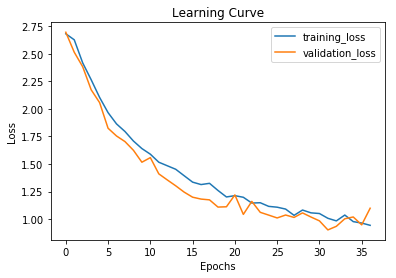

In [10]:
training_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

In [11]:
# load the saved model
from tensorflow.keras.models import load_model
print(model_path)
saved_model = load_model(model_path)
y_predict = saved_model.predict_classes(x_test_np)
y_predict

/home/jovyan/kaggle/aia-image-classification-by-CNN/best_model.h5


array([13,  7,  9, ...,  3, 12,  1])

In [12]:
sub = pd.DataFrame()
sub['ID'] = test_id
sub['class'] = y_predict
sub.to_csv('submission.csv',index=False)